In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# https://towardsdatascience.com/top-8-magic-commands-in-jupyter-notebook-c1582e813560

In [2]:
s6 = pd.read_csv('Data/s6_tuning.csv', parse_dates=['In_Date','Out_Date'])

In [3]:
#s6.info()

In [4]:
cols = ['Calc_Wear','Act_Wear','Class','Symmetry','Error','Rolled_Coils','In_Date','Out_Date','Campaign_Id']
wear = s6[cols]

In [6]:
#wear.head()

In [7]:
#wear['Symmetry'].value_counts()

In [8]:
#wear['Error'].hist(bins=30)

<AxesSubplot:>

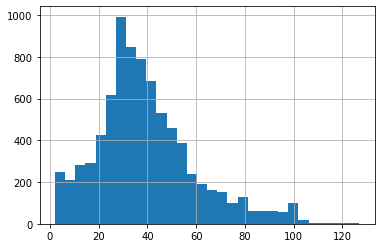

In [5]:
wear['Rolled_Coils'].hist(bins=30)

In [12]:
normal = wear.loc[(wear['Symmetry']=='uneven left') & (wear['Rolled_Coils'] > 9) & (wear['Rolled_Coils'] < 71)].copy()
normal.shape

(851, 9)

In [13]:
normal.sort_values(by='In_Date', inplace=True)

In [14]:
#normal.head(10)

<AxesSubplot:>

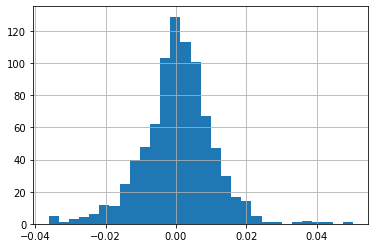

In [15]:
normal['Error'].hist(bins=30)

<AxesSubplot:>

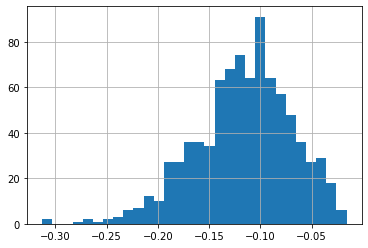

In [16]:
normal['Act_Wear'].hist(bins=30)

In [17]:
#normal['Act_Wear'].describe()

<AxesSubplot:xlabel='Rolled_Coils', ylabel='Act_Wear'>

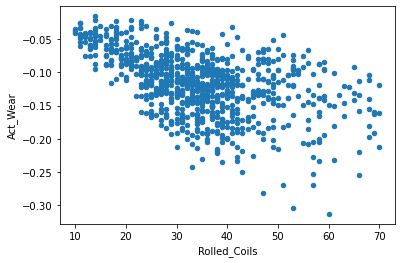

In [18]:
normal.plot.scatter('Rolled_Coils','Act_Wear')

## Z value for Intervals
    90.0%	1.645
    95.0%	1.960
    99.0%	2.576
    99.5%    2.807
    99.9%	3.291

In [19]:
camp_30 = normal.loc[normal['Rolled_Coils']==30]

In [20]:
# Confidence intervals (99.9%)
z = 3.291
s = camp_30['Act_Wear'].std()
m = camp_30['Act_Wear'].mean()
n = camp_30['Act_Wear'].count()
SE = s/np.sqrt(n)

uci = m + (z*SE)
lci = m - (z*SE)

print('Actual Wear Mean:',m)
print('Confidence interval 99.9%:[{0},{1}]'.format(lci,uci))

Actual Wear Mean: -0.11570656249999266
Confidence interval 99.9%:[-0.1385413457134933,-0.092871779286492]


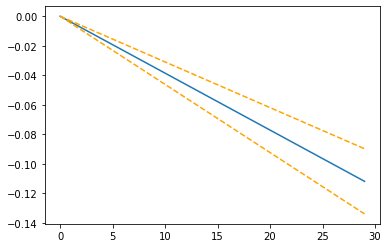

In [21]:
x = [x for x in range(30)]
ym = [x*m/30 for x in range(30)]
yu = [x*uci/30 for x in range(30)]
yl = [x*lci/30 for x in range(30)]

plt.plot(x,ym)
plt.plot(x,yu,ls='--',c='orange')
plt.plot(x,yl,ls='--',c='orange')

plt.show()

In [22]:
c6 = pd.read_csv('Data/coils_stand6.csv')
c6.columns

Index(['index', 'coil_id', 'setup', 'mat_quality', 'steel_grade',
       'grade_group', 'entry_time', 'exit_time', 'cvc_shift', 'thickness',
       'width', 'rolled_length', 'entry_temp', 'exit_temp', 'roll_qlty',
       'act_wear', 'code', 'campaign_id', 'stand'],
      dtype='object')

In [22]:
#c6.info()

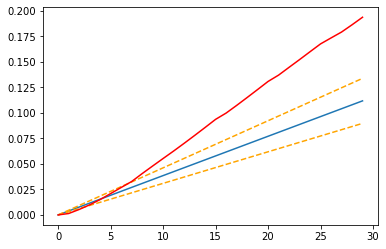

In [23]:
coils = c6.loc[c6['campaign_id']==34778]
yc = coils['act_wear'].to_list()

x = [x for x in range(30)]
ym = [abs(x*m/30) for x in range(30)]
yu = [abs(x*uci/30) for x in range(30)]
yl = [abs(x*lci/30) for x in range(30)]


plt.plot(x,ym)
plt.plot(x,yu,ls='--',c='orange')
plt.plot(x,yl,ls='--',c='orange')
plt.plot(x,yc,c='red')

plt.show()

In [24]:
over = wear.loc[(wear['Class']=='over') & (wear['Rolled_Coils'] > 29) & (wear['Rolled_Coils'] < 31)]
over.shape

(98, 9)

In [25]:
#over.tail()

In [26]:
under = wear.loc[(wear['Class']=='under') & (wear['Rolled_Coils'] > 29) & (wear['Rolled_Coils'] < 31)]
under.shape

(24, 9)

In [26]:
#under.tail()

In [27]:
def graph_comparison(x, wear, lower, upper, mean):
    plt.plot(x,mean)
    plt.plot(x,upper,ls='--',c='orange')
    plt.plot(x,lower,ls='--',c='orange')
    plt.plot(x,wear,c='red')

    plt.show()

# Comparison of Linear Model vs Calculated Wear

In [28]:
nc = [x for x in range(30)]
ym = [abs(x*m/30) for x in range(30)]
yu = [abs(x*uci/30) for x in range(30)]
yl = [abs(x*lci/30) for x in range(30)]

In [35]:
#wear.loc[wear['Campaign_Id']==32729]

# Campaigns with 30 coils and Normal variation

In [29]:
import random as rn
data = []
for x in range(20):
    data.append(rn.choice(camp_30['Campaign_Id'].to_list()))
    
data[:10]

[20475, 21787, 14203, 4986, 21364, 11597, 28188, 21364, 7401, 15495]

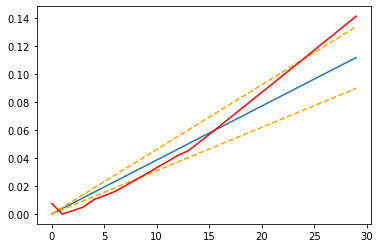

(0.1414, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [30]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[0]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [60]:
wear.loc[wear['Campaign_Id']==data[0]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
4704,-0.1045,-0.1036,normal,uneven left,0.0009,30,2019-08-13 23:28:25,2019-08-14 03:07:01,20914


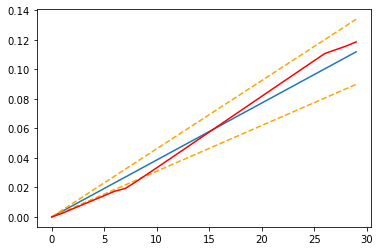

(0.11856, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [61]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[1]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [62]:
wear.loc[wear['Campaign_Id']==data[1]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
7457,-0.11856,-0.11511,normal,uneven left,0.00345,30,2020-10-05 04:58:10,2020-10-05 09:38:31,32741


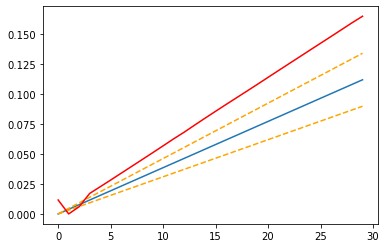

(0.16483, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [63]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[2]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [64]:
wear.loc[wear['Campaign_Id']==data[2]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
4826,-0.16483,-0.1708,normal,uneven left,-0.00597,30,2019-11-11 00:00:32,2019-11-11 04:36:42,21364


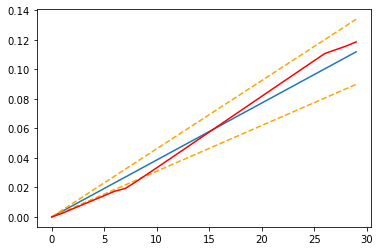

(0.11856, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [65]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[3]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [66]:
wear.loc[wear['Campaign_Id']==data[3]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
7457,-0.11856,-0.11511,normal,uneven left,0.00345,30,2020-10-05 04:58:10,2020-10-05 09:38:31,32741


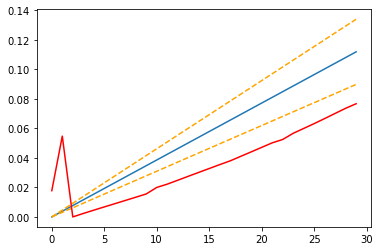

(0.07668, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [67]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[4]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [68]:
wear.loc[wear['Campaign_Id']==data[4]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
2858,-0.07668,-0.06555,normal,uneven left,0.01113,30,2019-03-26 01:41:21,2019-03-26 04:38:12,13526


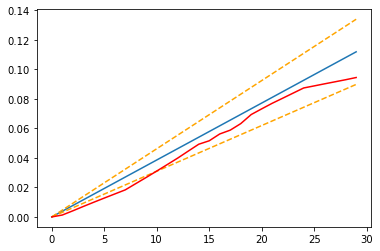

(0.09444, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [69]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[5]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [70]:
wear.loc[wear['Campaign_Id']==data[5]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
3225,-0.09444,-0.0923,normal,uneven left,0.00214,30,2019-05-31 05:25:50,2019-05-31 09:22:04,15081


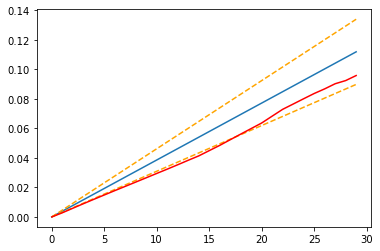

(0.09578, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [71]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[6]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [72]:
wear.loc[wear['Campaign_Id']==data[6]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
44,-0.09578,-0.0908,normal,uneven left,0.00498,30,2017-10-26 18:00:12,2017-10-26 20:57:39,280


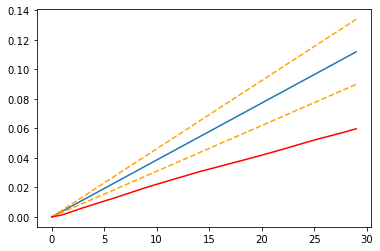

(0.05973, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [73]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[7]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [74]:
wear.loc[wear['Campaign_Id']==data[7]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
750,-0.05973,-0.06015,normal,uneven left,-0.00042,30,2018-01-21 07:03:41,2018-01-21 15:20:21,3516


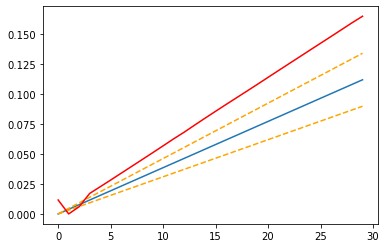

(0.16483, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [75]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[8]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [76]:
wear.loc[wear['Campaign_Id']==data[8]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
4826,-0.16483,-0.1708,normal,uneven left,-0.00597,30,2019-11-11 00:00:32,2019-11-11 04:36:42,21364


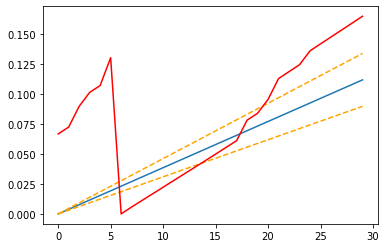

(0.16495, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [77]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[9]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [78]:
wear.loc[wear['Campaign_Id']==data[9]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
4669,-0.16495,-0.17555,normal,uneven left,-0.0106,30,2019-11-07 21:08:41,2019-11-08 01:34:08,20770


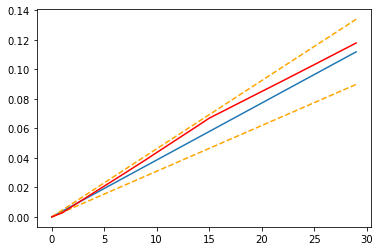

(0.11786, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [79]:
# Campaing with 30 coils - Normal Wear
cn = c6.loc[c6['campaign_id']==data[10]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [81]:
wear.loc[wear['Campaign_Id']==data[10]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
3757,-0.11786,-0.1378,normal,uneven left,-0.01994,30,2019-06-11 08:01:18,2019-06-11 11:20:54,17254


# Campaigns with 30 coils and Over Estimation

In [82]:
data = []
for x in range(20):
    data.append(rn.choice(over['Campaign_Id'].to_list()))
    
data[:10]

[16613, 25287, 12248, 216, 11038, 22091, 996, 216, 16867, 27207]

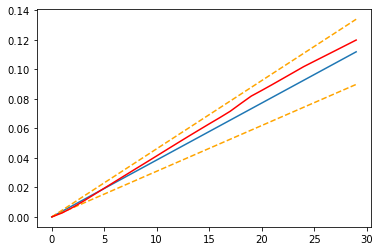

(0.11983, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [83]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[0]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [84]:
wear.loc[wear['Campaign_Id']==data[0]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
3589,-0.11983,-0.06225,over,even,0.05758,30,2019-07-27 13:49:49,2019-07-27 17:33:59,16613


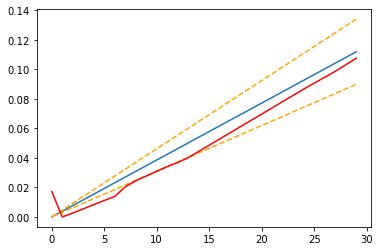

(0.10743, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [85]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[1]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [86]:
wear.loc[wear['Campaign_Id']==data[1]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
5791,-0.10743,-0.0698,over,even,0.03763,30,2020-01-19 02:15:36,2020-01-19 05:38:38,25287


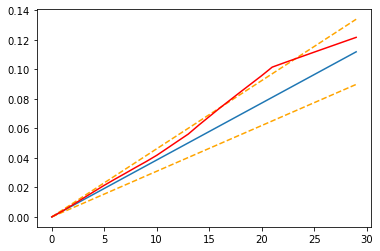

(0.12164, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [87]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[2]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [88]:
wear.loc[wear['Campaign_Id']==data[2]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
2569,-0.12164,-0.10125,over,even,0.02039,30,2018-09-01 20:55:20,2018-09-02 00:12:31,12248


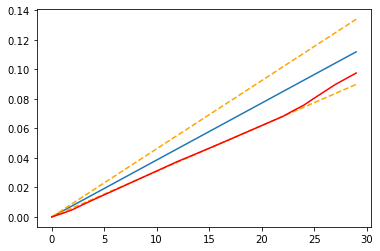

(0.09749, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [89]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[3]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [90]:
wear.loc[wear['Campaign_Id']==data[3]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
33,-0.09749,-0.07555,over,even,0.02194,30,2017-12-04 11:10:34,2017-12-04 14:49:27,216


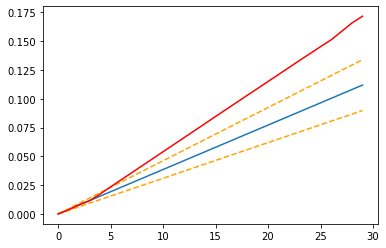

(0.1716, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [91]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[4]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [92]:
wear.loc[wear['Campaign_Id']==data[4]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
2262,-0.1716,-0.1256,over,even,0.046,30,2018-11-03 02:49:39,2018-11-03 07:04:00,11038


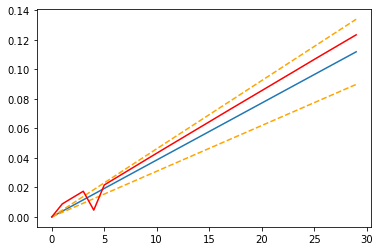

(0.12336, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [93]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[5]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [94]:
wear.loc[wear['Campaign_Id']==data[5]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
5005,-0.12336,-0.09715,over,even,0.02621,30,2019-03-07 19:40:33,2019-03-07 22:28:00,22091


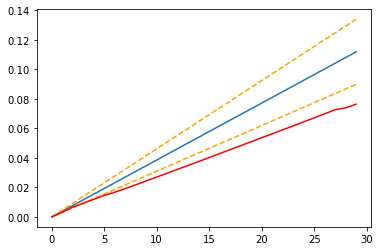

(0.07639, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [95]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[6]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [96]:
wear.loc[wear['Campaign_Id']==data[6]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
219,-0.07639,-0.0514,over,even,0.02499,30,2017-11-30 03:11:02,2017-11-30 07:17:51,996


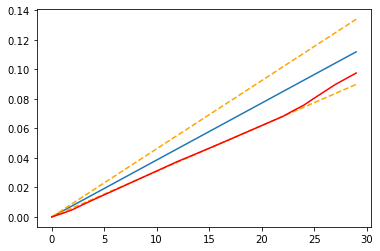

(0.09749, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [97]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[7]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [98]:
wear.loc[wear['Campaign_Id']==data[7]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
33,-0.09749,-0.07555,over,even,0.02194,30,2017-12-04 11:10:34,2017-12-04 14:49:27,216


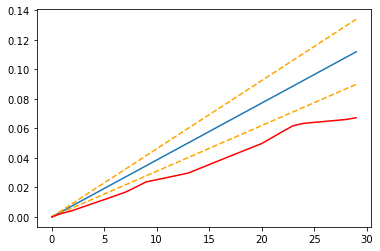

(0.06718, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [99]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[8]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [100]:
wear.loc[wear['Campaign_Id']==data[8]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
3665,-0.06718,-0.0357,over,even,0.03148,30,2018-08-07 11:59:43,2018-08-07 18:50:09,16867


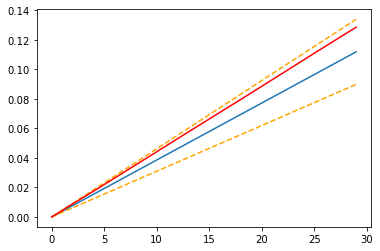

(0.1285, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [101]:
# Campaing with 30 coils - Over Wear
cn = c6.loc[c6['campaign_id']==data[9]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [102]:
wear.loc[wear['Campaign_Id']==data[9]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
6266,-0.1285,-0.0791,over,even,0.0494,30,2020-01-07 04:40:25,2020-01-07 08:21:50,27207


# Campaigns with 30 coils and Under Estimation

In [103]:
data = []
for x in range(20):
    data.append(rn.choice(under['Campaign_Id'].to_list()))
    
data[:10]

[23461, 21191, 23656, 11626, 2630, 11626, 34161, 5713, 11626, 34161]

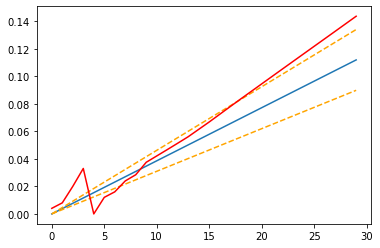

(0.14357, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [104]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[0]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [105]:
wear.loc[wear['Campaign_Id']==data[0]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
5346,-0.14357,-0.18645,under,even,-0.04288,30,2019-11-18 01:59:29,2019-11-18 05:16:20,23461


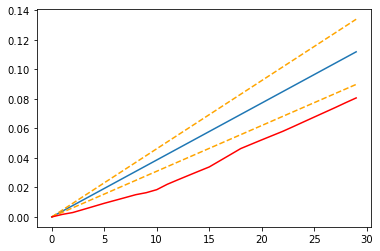

(0.08061, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [106]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[1]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [107]:
wear.loc[wear['Campaign_Id']==data[1]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
4778,-0.08061,-0.1015,under,even,-0.02089,30,2019-10-07 20:47:27,2019-10-08 00:14:30,21191


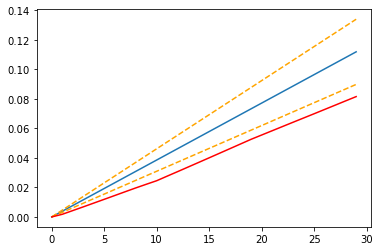

(0.08151, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [108]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[2]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [109]:
wear.loc[wear['Campaign_Id']==data[2]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
5401,-0.08151,-0.10525,under,uneven right,-0.02374,30,2019-11-13 23:24:12,2019-11-14 06:17:15,23656


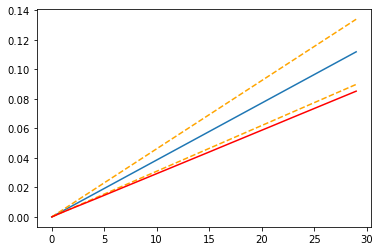

(0.08519, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [110]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[3]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [111]:
wear.loc[wear['Campaign_Id']==data[3]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
2409,-0.08519,-0.1183,under,even,-0.03311,30,2019-02-02 22:02:08,2019-02-03 01:03:32,11626


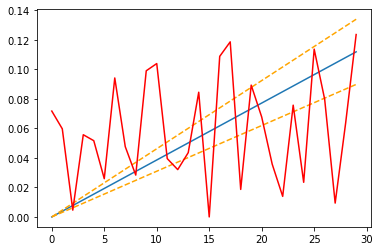

(0.12356, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [112]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[4]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [113]:
wear.loc[wear['Campaign_Id']==data[4]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
568,-0.12356,-0.1603,under,even,-0.03674,30,2018-05-21 12:51:02,2018-05-21 15:53:43,2630


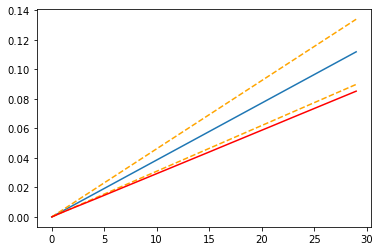

(0.08519, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [114]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[5]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [115]:
wear.loc[wear['Campaign_Id']==data[5]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
2409,-0.08519,-0.1183,under,even,-0.03311,30,2019-02-02 22:02:08,2019-02-03 01:03:32,11626


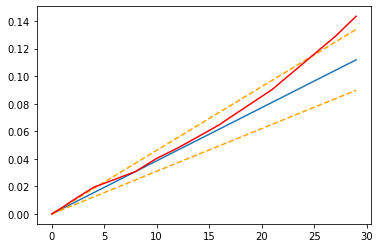

(0.14347, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [122]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[10]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [123]:
wear.loc[wear['Campaign_Id']==data[10]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
452,-0.14347,-0.17005,under,even,-0.02658,30,2018-03-07 10:47:02,2018-03-07 14:29:36,2145


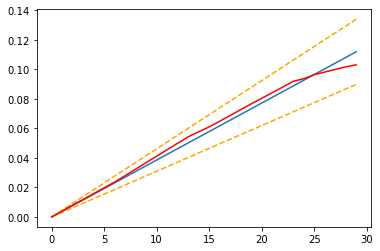

(0.10304, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [124]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[7]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [125]:
wear.loc[wear['Campaign_Id']==data[7]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
1179,-0.10304,-0.1256,under,even,-0.02256,30,2018-06-23 04:53:41,2018-06-23 09:50:35,5713


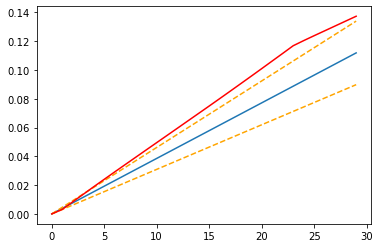

(0.13731, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [128]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[11]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [129]:
wear.loc[wear['Campaign_Id']==data[11]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
7161,-0.13731,-0.16075,under,even,-0.02344,30,2020-09-22 13:39:47,2020-09-22 16:57:57,31269


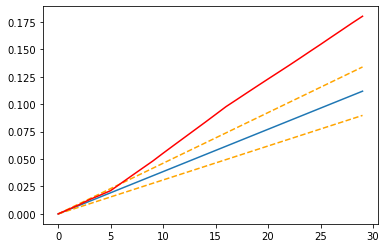

(0.18015, 0.13392330085637685, 0.11184967708332623, 0.0897760533102756)

In [130]:
# Campaing with 30 coils - Under Wear
cn = c6.loc[c6['campaign_id']==data[9]]
yc = cn['act_wear'].to_list()

graph_comparison(nc,yc,yl,yu,ym)

yc[-1],yl[-1],ym[-1],yu[-1]

In [131]:
wear.loc[wear['Campaign_Id']==data[9]]

,Calc_Wear,Act_Wear,Class,Symmetry,Error,Rolled_Coils,In_Date,Out_Date,Campaign_Id
7741,-0.18015,-0.20855,under,even,-0.0284,30,2020-10-02 00:45:43,2020-10-02 05:20:17,34161


In [132]:
cn

,index,coil_id,setup,mat_quality,steel_grade,grade_group,entry_time,exit_time,cvc_shift,thickness,width,rolled_length,entry_temp,exit_temp,roll_qlty,act_wear,code,campaign_id,stand
19660,0,20156041-05,1956,1,1001S04,LOWCARBON,2020-10-02 00:52:31.497,2020-10-02 00:54:54.407,63.0,2.85676,1169.0,716.0,1018.559848,895.696137,2.0,0.00000,0,34161,6
19661,1,20156041-06,1967,1,1001S04,LOWCARBON,2020-10-02 00:56:47.627,2020-10-02 00:59:06.663,47.0,2.85676,1169.0,716.0,1007.765480,869.589540,2.0,0.00418,0,34161,6
19662,2,20156041-07,1975,1,1001S04,LOWCARBON,2020-10-02 01:00:47.667,2020-10-02 01:03:14.483,39.0,2.85676,1169.0,790.0,1011.532281,874.396580,2.0,0.00841,0,34161,6
19663,3,20156061-01,1987,2,1001S04,LOWCARBON,2020-10-02 01:06:36.927,2020-10-02 01:08:35.210,22.0,3.17501,1127.0,577.0,1004.534561,905.952963,2.0,0.01310,0,34161,6
19664,4,20156061-02,1999,1,1001S04,LOWCARBON,2020-10-02 01:13:00.953,2020-10-02 01:15:00.173,35.0,3.17501,1127.0,610.0,1011.735274,897.188863,2.0,0.01709,0,34161,6
19665,5,20156061-03,2012,1,1005A04,LOWCARBON,2020-10-02 01:22:30.060,2020-10-02 01:25:16.033,42.0,2.36960,1128.0,1239.0,1005.394348,895.718223,2.0,0.02122,0,34161,6
19666,6,20156061-04,2025,1,1005A04,LOWCARBON,2020-10-02 01:32:16.657,2020-10-02 01:35:01.583,34.0,2.36960,1128.0,1238.0,1010.391871,893.437623,2.0,0.02797,0,34161,6
19667,7,20156061-05,2043,1,1005A04,LOWCARBON,2020-10-02 01:42:03.673,2020-10-02 01:44:48.223,35.0,2.36960,1128.0,1238.0,1011.412860,889.154930,2.0,0.03474,0,34161,6
19668,8,20156061-06,2055,1,1005A04,LOWCARBON,2020-10-02 01:51:50.957,2020-10-02 01:54:35.803,36.0,2.36960,1128.0,1237.0,1013.078718,893.626850,2.0,0.04143,0,34161,6
19669,9,20156061-07,2066,1,1005A04,LOWCARBON,2020-10-02 02:00:39.610,2020-10-02 02:03:17.960,48.0,1.87633,1127.0,1380.0,1016.087960,884.479275,2.0,0.04809,0,34161,6
